In [1]:
# Fonots

# Használathoz fel kell tölteni a metric_____.log filét ha Google Colabon használod.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime, date, time

In [2]:
import sys
 
# setting path
sys.path.append('../..')

import train_by_none as trbn

# from scale_by_train15 import read_trained_csv, get_train_features, get_current_worker_number, get_last_df_info

# from scale_by_train15 import load_tf_model

---------------------------------------
printTest
---------------------------------------
---------------------------------------
cyan
---------------------------------------
---------------------------------------
red
---------------------------------------
---------------------------------------
green
---------------------------------------
---------------------------------------
yellow
---------------------------------------
---------------------------------------
blue
---------------------------------------
---------------------------------------
magenta
---------------------------------------
---------------------------------------
white
---------------------------------------
---------------------------------------
red
---------------------------------------
---------------------------------------
                RESTART                
---------------------------------------
---------------------------------------
                SET LOG                
-------------------------

In [39]:
jmfile = 'test_026.csv'

jf = pd.read_csv(jmfile, sep=',', header=0)

jf['RT_LIMIT_UPPER'] = trbn.rt_limit_upper
jf['RT_LIMIT_LOWER'] = trbn.rt_limit_lower

jf.head(2)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER
0,1684660122572,45,HTTP Request FIBO,200,NaN,Thread Group FIBO 1-1,text,True,NaN,323,138,3,3,http://193.225.250.30/cpu/fibonacci_no_gc/16,42,0,10,500,200
1,1684660122602,22,HTTP Request FIBO,200,NaN,Thread Group FIBO 1-2,text,True,NaN,322,138,3,3,http://193.225.250.30/cpu/fibonacci_no_gc/16,22,0,4,500,200


In [40]:
FIBO  = jf.loc[jf['label'] == 'HTTP Request FIBO']

PRIME = jf.loc[jf['label'] == 'HTTP Request PRIME']

print(FIBO.shape)
print(PRIME.shape)

(36792, 19)
(34926, 19)


In [11]:
import datetime

# Get current date and time
now = datetime.datetime.now()
print(now)
print("Second:", now.second)

2023-05-25 09:59:40.309892
Second: 40


In [41]:
jf = jf.astype({'timeStamp':'int'})
FIBO  = FIBO.astype({'timeStamp':'int'})
PRIME = PRIME.astype({'timeStamp':'int'})

import datetime

# Valójában ez mind szar, nem ezt akarom kiszámolni, hanem azt adott időszeletekben vett átlagot

jf['date'] = jf['timeStamp'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000))
FIBO['date'] = FIBO['timeStamp'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000))
PRIME['date'] = PRIME['timeStamp'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000))

FIBO.head(2)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER,date
0,1684660122572,45,HTTP Request FIBO,200,NaN,Thread Group FIBO 1-1,text,True,NaN,323,138,3,3,http://193.225.250.30/cpu/fibonacci_no_gc/16,42,0,10,500,200,2023-05-21 09:08:42.572
1,1684660122602,22,HTTP Request FIBO,200,NaN,Thread Group FIBO 1-2,text,True,NaN,322,138,3,3,http://193.225.250.30/cpu/fibonacci_no_gc/16,22,0,4,500,200,2023-05-21 09:08:42.602


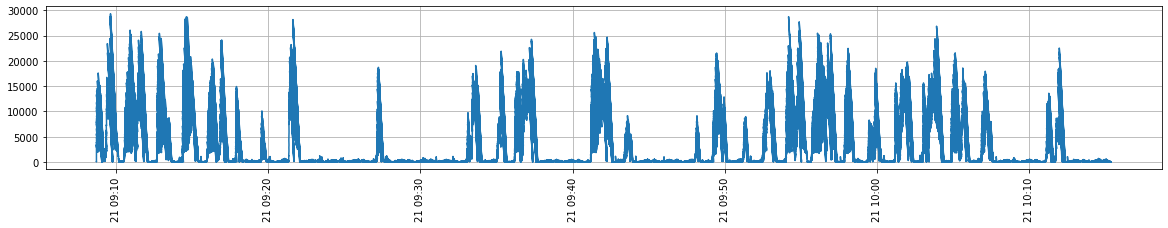

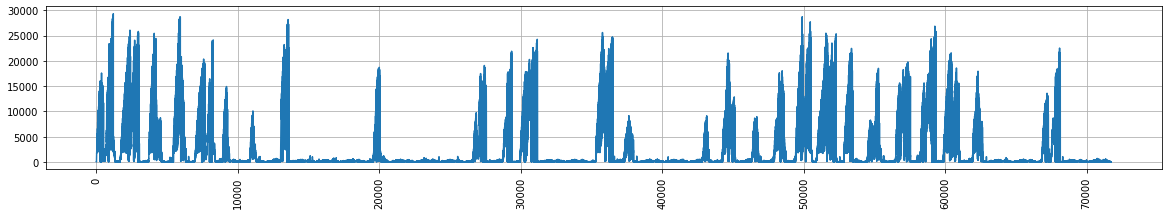

In [42]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

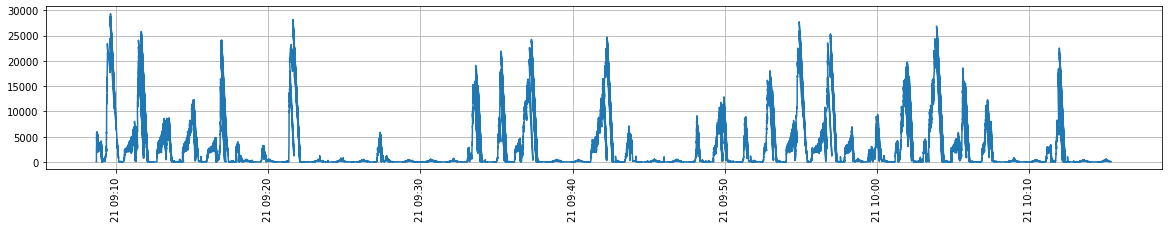

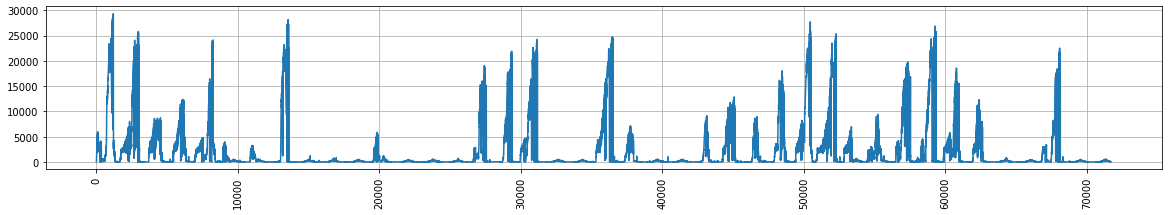

In [43]:
plt.figure(figsize=(20, 3))
plt.plot(FIBO['date'], FIBO['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(FIBO['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

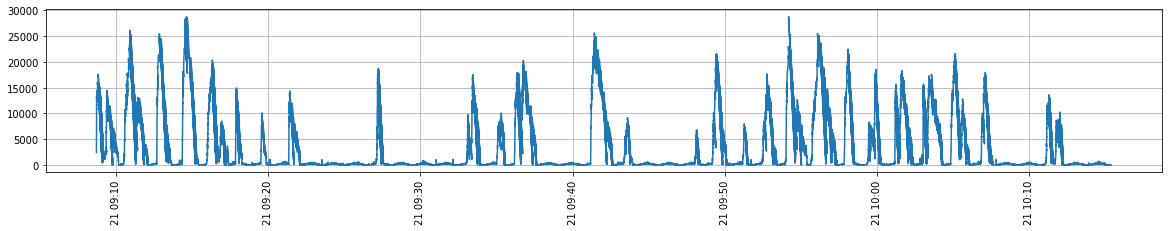

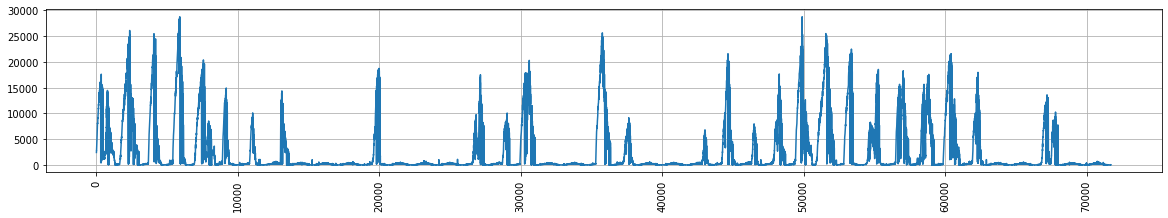

In [44]:
plt.figure(figsize=(20, 3))
plt.plot(PRIME['date'], PRIME['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(PRIME['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

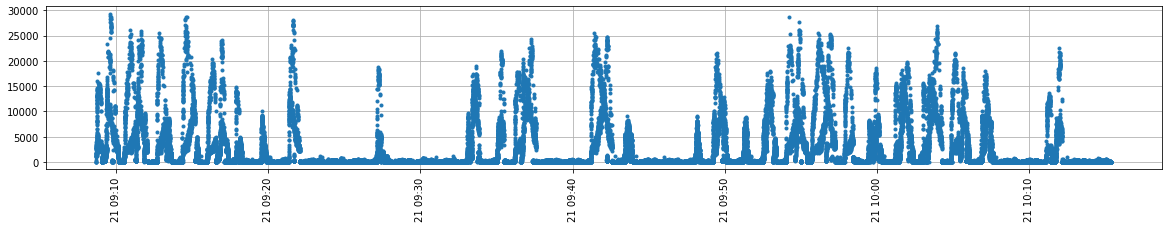

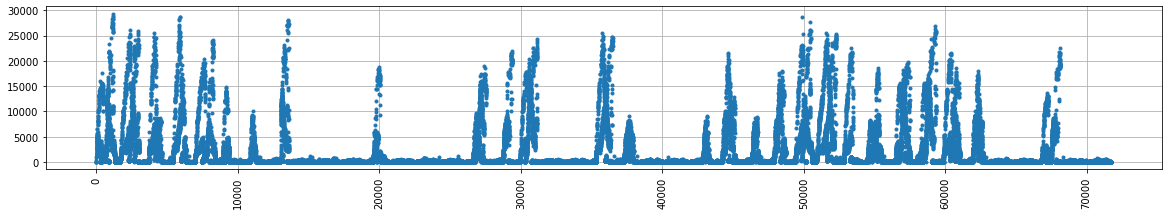

In [45]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

In [46]:
x = np.arange(0, jf['Latency'].size)
jf['_x'] = x

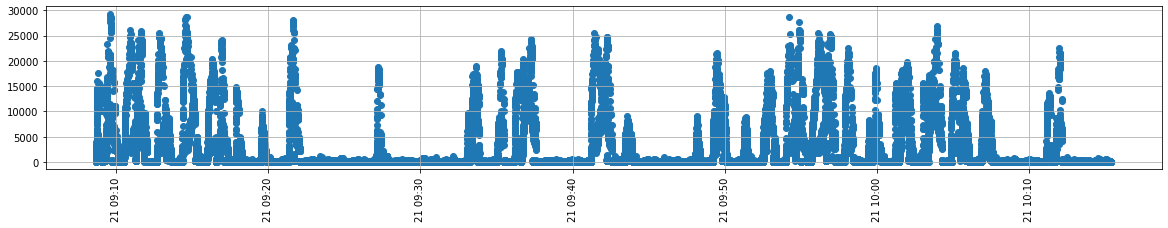

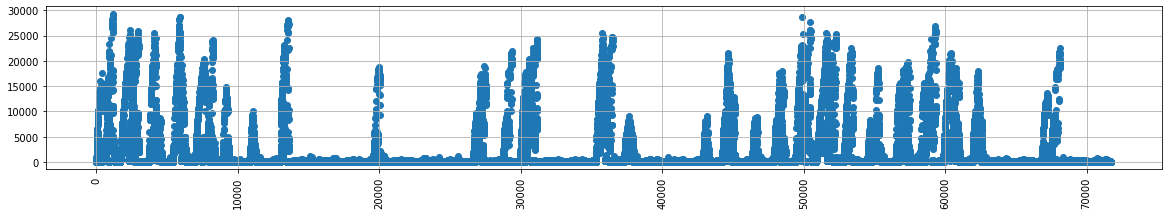

In [47]:
plt.figure(figsize=(20, 3))
plt.scatter(jf['date'], jf['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.scatter(jf['_x'], jf['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

In [48]:

# rá kell toszni még a rolling meant és az időre számolt átlagot

jf['ma10rt'] = jf['Latency'].rolling(10).mean()


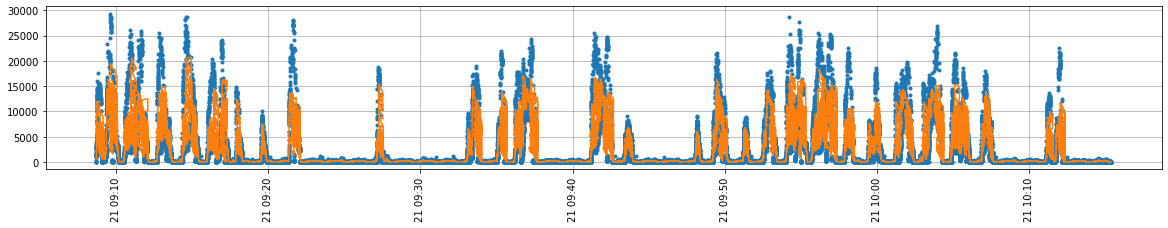

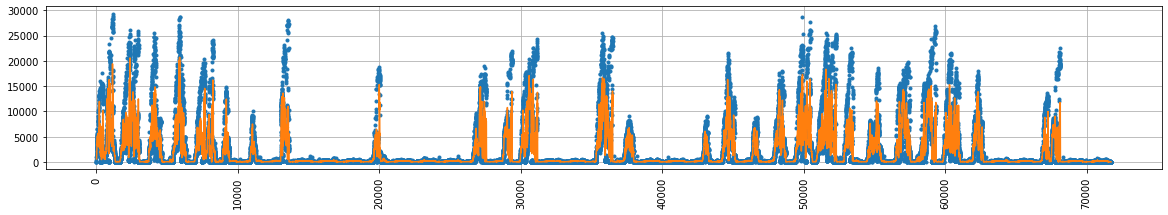

In [49]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['date'], jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

In [50]:
jf.groupby([jf['date'].dt.hour]).Latency.sum()

date
9     103391928
10     29554398
Name: Latency, dtype: int64

In [51]:
jf.groupby([jf['date'].dt.minute]).Latency.sum()

date
0      992499
1     4669777
2     1678778
3     5912230
4     1888025
5     4772468
6      963591
7     3091099
8     2052012
9     4702656
10    3415952
11    8734652
12    3343868
13    3112164
14    4117357
15    1646103
16    4887211
17    1921374
18     768929
19    1309926
20     128855
21    4006128
22     292011
23     139429
24     190175
25     132466
26     131842
27    2009237
28     132673
29     128569
30     194135
31     141412
32     125897
33    4256386
34     124549
35    3002882
36    4407386
37    3262811
38     178653
39     125174
40     138133
41    4822777
42    3221154
43    2310467
44     123688
45     137616
46     189316
47     124980
48    1400677
49    4496484
50     569373
51    1668493
52    3132584
53    1500566
54    5928854
55    2973572
56    6034699
57    1933624
58    2212526
59    2935402
Name: Latency, dtype: int64

In [52]:
jf.groupby(by=[jf.date.map(lambda x : x.hour),
               jf.date.map(lambda x : x.minute)]).Latency.mean()

date  date
9     8       6009.198718
      9       5635.348522
      10      3120.881566
      11      6719.715047
      12      2102.129954
                 ...     
10    11      3383.620183
      12       978.873849
      13       135.649416
      14       135.686877
      15       125.708889
Name: Latency, Length: 68, dtype: float64

In [53]:
jf['date'][0].year
jf['date'][0].month
jf['date'][0].day
jf['date'][0].hour
jf['date'][0].minute
jf['date'][0].second

42

In [54]:
jf['minute'] = jf['date'].map(lambda x : x.minute)
jf['second'] = jf['date'].map(lambda x : x.second)
jf['sec']    = jf['date'].map(lambda x : x.second//10)

In [55]:
md = jf.groupby([jf['date'].dt.minute, jf['date'].dt.second]).Latency.mean()

In [56]:
md

date  date
0     0        7198.142857
      1        7625.555556
      2        8038.100000
      3        8364.125000
      4        8046.750000
                  ...     
59    55      10559.666667
      56       5655.789474
      57       6277.100000
      58       7997.400000
      59       8284.555556
Name: Latency, Length: 3599, dtype: float64

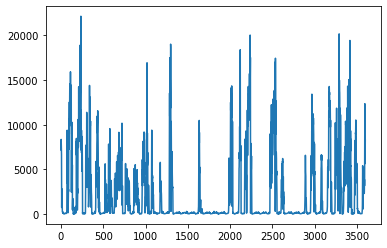

In [57]:
plt.plot(md.values)

In [58]:
_minutes = md.index.levels[0]
_seconds = md.index.levels[1]

_minutes_lowest = _minutes.min()
_minutes_highest = _minutes.max()

_seconds_lowest = _seconds.min()
_seconds_highest = _seconds.max()

print(' sec min %.1d sec max %.1d' % (_seconds_lowest, _seconds_highest))
print(' min min %.1d min max %.1d' % (_minutes_lowest, _minutes_highest))

 sec min 0 sec max 59
 min min 0 min max 59


In [59]:
tt = []
tp = []

start_date = str(jf['date'].loc[0])[:14]

for _ in md.index:
    m = _[0]
    s = _[1]
    tp.append(start_date + str(m) + ':' + str(s))

tp = pd.DataFrame(tp, columns=['date'])
tp = pd.to_datetime(tp['date'])
tp.head(3)

tp = pd.DataFrame(tp)
tp['md'] = 100
tp['md'] = md.values
tp.head()

,date,md
0,2023-05-21 09:00:00,7198.142857
1,2023-05-21 09:00:01,7625.555556
2,2023-05-21 09:00:02,8038.100000
3,2023-05-21 09:00:03,8364.125000
4,2023-05-21 09:00:04,8046.750000


In [60]:
mz = jf.groupby([jf['date'].dt.minute, jf['sec']]).Latency.mean()

mz

date  sec
0     0      5496.726415
      1      1543.689189
      2       159.132948
      3        70.474747
      4        51.542714
                ...     
59    1        55.515000
      2      2146.647321
      3      3075.219101
      4      3168.874346
      5      7154.229050
Name: Latency, Length: 360, dtype: float64

In [61]:
# Meg van a 10 másodperces, ehhez kell legyártani most a dátumokat

# 10 másodperces

tt = []
tz = []

start_date = str(jf['date'].loc[0])[:14]

_first_sec = jf['second'].loc[0]

c = 0
for _ in mz.index:
    m = _[0]
    s = _[1]
    if c == 0:
        c += 1
        tt.append([m, s])
        tz.append(start_date + str(m) + ':' + str(_first_sec))
    else:
        tt.append([m, s])
        tz.append(start_date + str(m) + ':' + str(s*10))
    # print(s, _)

tz = pd.DataFrame(tz, columns=['date'])
tz.head()

tz = pd.to_datetime(tz['date'])
tz.head()

tz = pd.DataFrame(tz)
tz['md'] = 100
tz['md'] = mz.values
tz.head()

# Össze van fűzve a tz (idő) és az mz (group by sec) -> lehet rátenni a plotra

,date,md
0,2023-05-21 09:00:42,5496.726415
1,2023-05-21 09:00:10,1543.689189
2,2023-05-21 09:00:20,159.132948
3,2023-05-21 09:00:30,70.474747
4,2023-05-21 09:00:40,51.542714


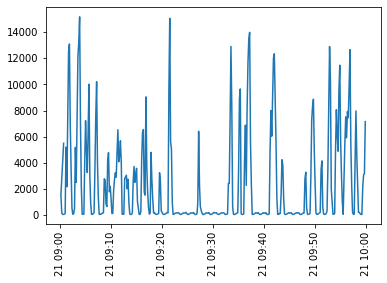

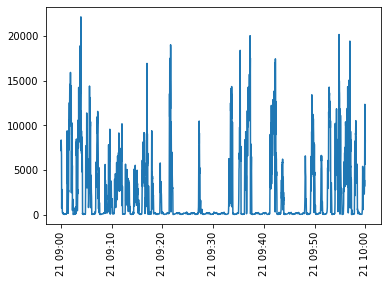

In [62]:
plt.plot(tz['date'], tz['md'])
plt.xticks(rotation=90)
plt.show()

# Ezt kéne rátenni a másikra (ez a tiz másodperc alapú)

plt.plot(tp['date'], tp['md'])
plt.xticks(rotation=90)
plt.show()

# Ezt kéne rátenni a másikra (ez a másodperc másodperc alapú)

In [63]:
print(tp['date'][0])
print(tz['date'][0])

2023-05-21 09:00:00
2023-05-21 09:00:42


In [64]:
# Ha tologatnom kéne őket

from datetime import datetime, timedelta

# tz['date'] = tz['date'] + timedelta(seconds=1)
# tp['date'] = tp['date'] + timedelta(seconds=1)

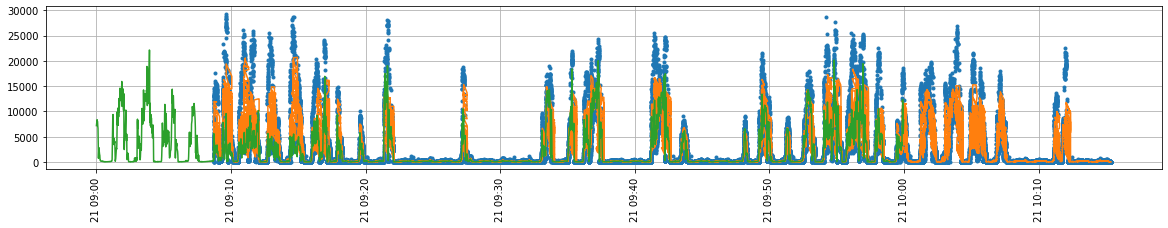

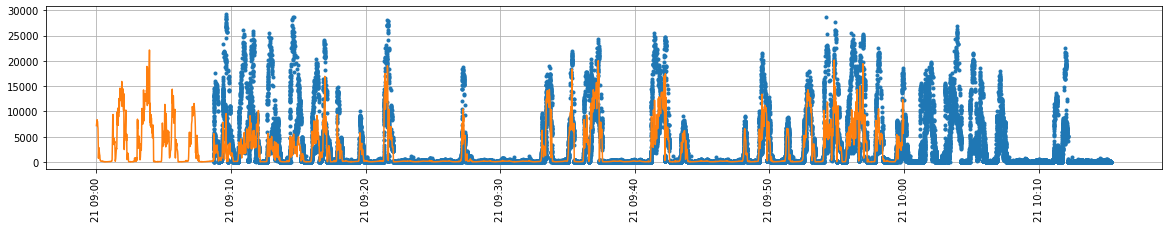

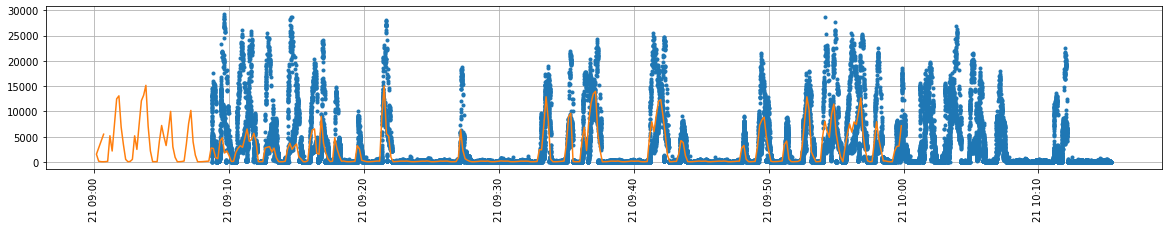

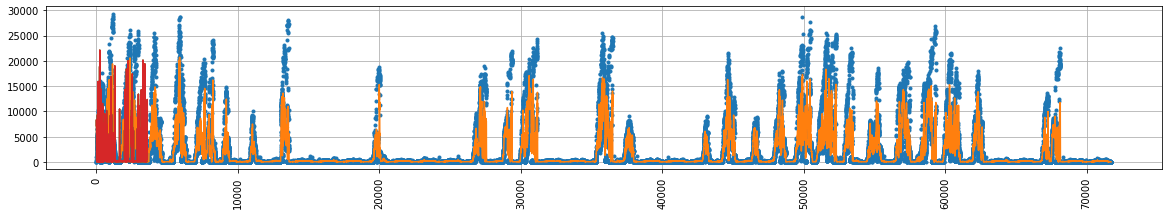

In [65]:
# Idő alapú
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['date'], jf['ma10rt'])
plt.plot(tp['date'], tp['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.savefig('test.png')

# Idő alapú (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tp['date'], tp['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.savefig('test.png')

# Idő alapú (jo) -> esetleg még ez (ha nagyon sok adat van és hosszú volt a futás)
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tz['date'], tz['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.savefig('test.png')

# Seqvencia alapú (ahogy jöttek be a kérések úgy van plottolva sorban egymás után)
plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['ma10rt'])
plt.plot(md.values)
plt.plot(tp['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.savefig('test.png')

## Tehát ez volt a rossz amit ki akartam javítani.

De ami még hiányzik, hogy a fentire rátegyem a VM-ek számának alaulását.

(Ugye az van hogy a két adat kétféle adatbáisból jön)

Az egyes latencyket a JMeter, A metrikákat (így a VM számot is a LoadBalacner) rögzítette

Ezt a kettőt kell összefésülni.

In [66]:
metric_file_name = 'metric_train_by_none.log'

df = pd.read_csv(metric_file_name, sep=',', header=0)

df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.6,09:08:55,09:08:5,8009.67920,3767.828744,1,13.3,96.2,0.0,100.0,...,104982.0,1075456.8,0.0,308228.8,100.0,81.6,81.6,82.7,81.6,82.7
1,192.168.0.6,09:09:03,09:09:0,3577.65165,2875.164904,1,9.4,95.3,0.0,100.0,...,104725.2,1084296.8,0.0,306062.4,100.0,82.9,82.9,82.7,82.9,82.8
2,192.168.0.6,09:09:12,09:09:1,3414.26700,1279.841000,4,13.7,97.1,0.1,99.9,...,104818.8,1085862.8,0.0,306144.8,100.0,42.0,42.0,47.2,42.0,47.3
3,192.168.0.6,09:09:22,09:09:2,2432.85030,1260.231949,2,17.8,96.7,1.0,99.0,...,104033.2,1080276.4,0.0,306056.0,100.0,54.7,54.7,53.4,54.7,53.5
4,192.168.0.6,09:09:44,09:09:3,14431.33115,8518.578188,1,15.4,97.0,0.0,100.0,...,104467.2,1091607.6,0.0,305139.2,100.0,55.1,55.1,54.5,54.6,54.0


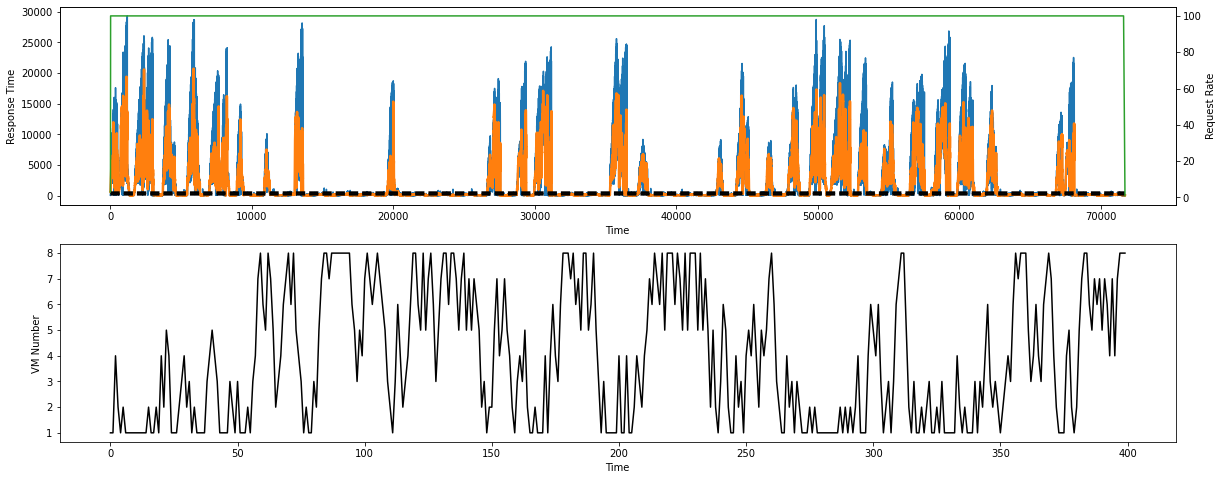

In [67]:
def jmf():
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    ax1.plot(jf['Latency'], color = 'C0')
    
    ax1.plot(jf['ma10rt'], color = 'C1', lw = 2.5)
    
    ax1.plot(jf['RT_LIMIT_LOWER'], color = 'black', lw = 2.5, ls = '--')
    ax1.plot(jf['RT_LIMIT_UPPER'], color = 'black', lw = 2.5, ls = '--')
    

    ax2 = ax1.twinx()

    ax2.plot(jf['allThreads'], color = 'C2')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    ax2.set_ylabel('Request Rate')

    ax3.plot(df['worker_number'], color = 'black')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')

    plt.show()

jmf()

## Miért csináltam ezt az egészet?

### Különös tekintettel erre az adott Test25 mérésre.

Ebben a terhelésben két REST API végpontot hívtam. A metric_log filében 10 másodpercentként visszamért átlagos válaszidőből nem tudom megállapítani, hogy melyik REST API végponthoz melyik válaszidő tartozik és ez nem is lehetséges, hiszen ezek még átlagolva is voltak.

Amire csak kíváncsi voltam, hogy hat-e az egyik REST API válaszidejére a másik REST API. Mivel ebben a kisérletben aszinkronban voltak a REST API-k, a beérkező kérések száma mindkettőre azonos és konstans volt. Csak a kapott paraméteren keresztül tudtam hatást gyakorolni arra, hogy mennyire legyen számításigényes az adott feladat. Ezek a paraméterek kerültek aszinkron módon beküldésre úgy, hogy amikor az egyik REST API számításigényes paramétert kapott akkor a másik nem és fordítva.

**Ha ezek után** a két válaszidő külön külön is egy időben emelkedett meg és a válaszidejeik megemelkedései szinkronban vannak, akkor ez azt jelenti, hogy a másik REST API hatása.

Igaz ezt a kísérletet jobb lett volna úgy elvégezni, hogy közben nem mozgatom a Workerek számát, mert önmagában ez is hatással lehet egyik vagy másik vagy mindkét REST API válaszidejére.

---

Ezek után nézzük meg, hogy alault a két REST API válaszideje és a Workerek száma.

In [68]:
from datetime import datetime

datetime_str = '2023-05-17 13:55:26'

df['ntime'] = '2023-05-21 ' + df['time'] + '0'

df['nntime'] = df['ntime'].apply(lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))


In [69]:
df.head(3)

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs,ntime,nntime
0,192.168.0.6,09:08:55,09:08:5,8009.67920,3767.828744,1,13.3,96.2,0.0,100.0,...,0.0,308228.8,100.0,81.6,81.6,82.7,81.6,82.7,2023-05-21 09:08:50,2023-05-21 09:08:50
1,192.168.0.6,09:09:03,09:09:0,3577.65165,2875.164904,1,9.4,95.3,0.0,100.0,...,0.0,306062.4,100.0,82.9,82.9,82.7,82.9,82.8,2023-05-21 09:09:00,2023-05-21 09:09:00
2,192.168.0.6,09:09:12,09:09:1,3414.26700,1279.841000,4,13.7,97.1,0.1,99.9,...,0.0,306144.8,100.0,42.0,42.0,47.2,42.0,47.3,2023-05-21 09:09:10,2023-05-21 09:09:10


In [70]:
df.tail(3)

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs,ntime,nntime
397,192.168.0.6,10:15:00,10:15:0,306.96140,165.038396,8,19.7,40.0,58.6,41.3,...,0.0,105004.4,100.0,18.5,18.5,17.9,18.5,18.0,2023-05-21 10:15:00,2023-05-21 10:15:00
398,192.168.0.6,10:15:10,10:15:1,435.68335,181.869737,8,19.8,48.0,51.2,48.8,...,0.0,105020.4,100.0,18.6,18.6,17.9,18.6,18.0,2023-05-21 10:15:10,2023-05-21 10:15:10
399,192.168.0.6,10:15:20,10:15:2,207.85480,80.623513,8,19.7,20.1,78.2,21.7,...,0.0,105145.2,100.0,17.5,17.5,17.0,17.5,17.1,2023-05-21 10:15:20,2023-05-21 10:15:20


In [71]:
# 56:58

df.tail(10)

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs,ntime,nntime
390,192.168.0.6,10:13:50,10:13:5,204.57570,85.133320,5,19.4,28.4,69.9,30.0,...,0.0,104981.2,100.0,28.8,28.8,27.9,28.8,28.0,2023-05-21 10:13:50,2023-05-21 10:13:50
391,192.168.0.6,10:14:00,10:14:0,94.55900,42.419377,7,19.1,13.2,84.3,15.1,...,0.0,104984.0,100.0,20.0,20.0,19.2,20.0,19.3,2023-05-21 10:14:00,2023-05-21 10:14:00
392,192.168.0.6,10:14:10,10:14:1,113.08165,52.699955,6,20.0,10.7,87.0,12.7,...,0.0,105000.4,100.0,22.9,22.9,21.8,22.9,21.9,2023-05-21 10:14:10,2023-05-21 10:14:10
393,192.168.0.6,10:14:20,10:14:2,200.76760,83.305090,4,19.9,52.9,45.4,54.5,...,0.0,104990.4,100.0,31.7,31.7,31.4,31.7,31.5,2023-05-21 10:14:20,2023-05-21 10:14:20
394,192.168.0.6,10:14:30,10:14:3,304.61575,128.489510,7,19.6,37.4,61.6,38.4,...,0.0,104996.0,100.0,21.6,21.6,20.7,21.6,20.8,2023-05-21 10:14:30,2023-05-21 10:14:30
395,192.168.0.6,10:14:40,10:14:4,554.31230,194.865160,4,20.0,79.9,18.1,81.5,...,0.0,105002.8,100.0,32.4,32.4,31.6,31.9,31.2,2023-05-21 10:14:40,2023-05-21 10:14:40
396,192.168.0.6,10:14:50,10:14:5,299.32450,150.975843,7,19.8,41.5,57.4,42.5,...,0.0,105019.2,100.0,21.1,21.1,20.4,21.1,20.5,2023-05-21 10:14:50,2023-05-21 10:14:50
397,192.168.0.6,10:15:00,10:15:0,306.96140,165.038396,8,19.7,40.0,58.6,41.3,...,0.0,105004.4,100.0,18.5,18.5,17.9,18.5,18.0,2023-05-21 10:15:00,2023-05-21 10:15:00
398,192.168.0.6,10:15:10,10:15:1,435.68335,181.869737,8,19.8,48.0,51.2,48.8,...,0.0,105020.4,100.0,18.6,18.6,17.9,18.6,18.0,2023-05-21 10:15:10,2023-05-21 10:15:10
399,192.168.0.6,10:15:20,10:15:2,207.85480,80.623513,8,19.7,20.1,78.2,21.7,...,0.0,105145.2,100.0,17.5,17.5,17.0,17.5,17.1,2023-05-21 10:15:20,2023-05-21 10:15:20


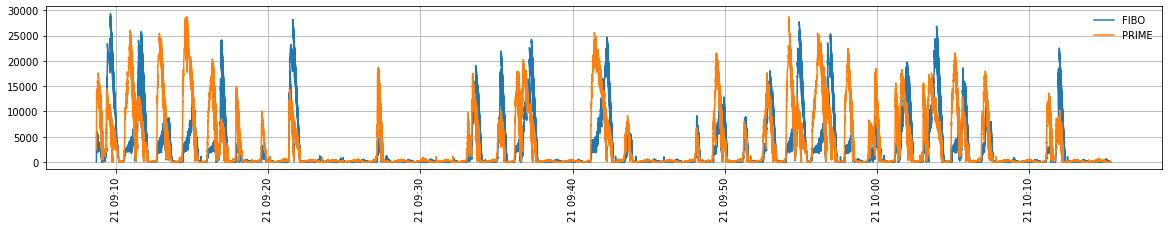

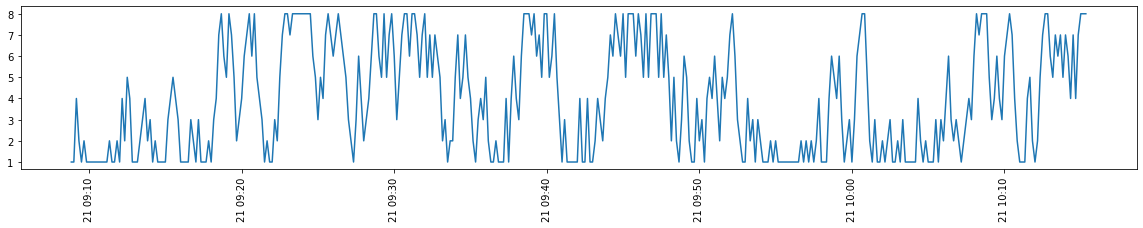

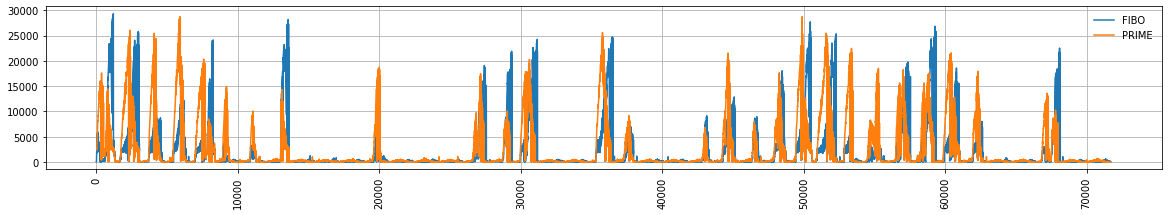

In [72]:
# Teljesen jó,

# Csupán az van hogy 3 plot van és a vízszintes méretük nem azonos ezért látszódik úgy, hogy az időpontok
# nincsenek szinkronban (1 és 2 plot)

plt.figure(figsize=(20, 3))
plt.plot(FIBO['date'], FIBO['Latency'], label='FIBO')
plt.plot(PRIME['date'], PRIME['Latency'], label='PRIME')
plt.grid(b='on')
plt.xticks(rotation=90)
plt.legend(frameon=False)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(df['nntime'], df['worker_number'])
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(FIBO['Latency'], label='FIBO')
plt.plot(PRIME['Latency'], label='PRIME')
plt.grid(b='on')
plt.xticks(rotation=90)
plt.legend(frameon=False)
plt.show()

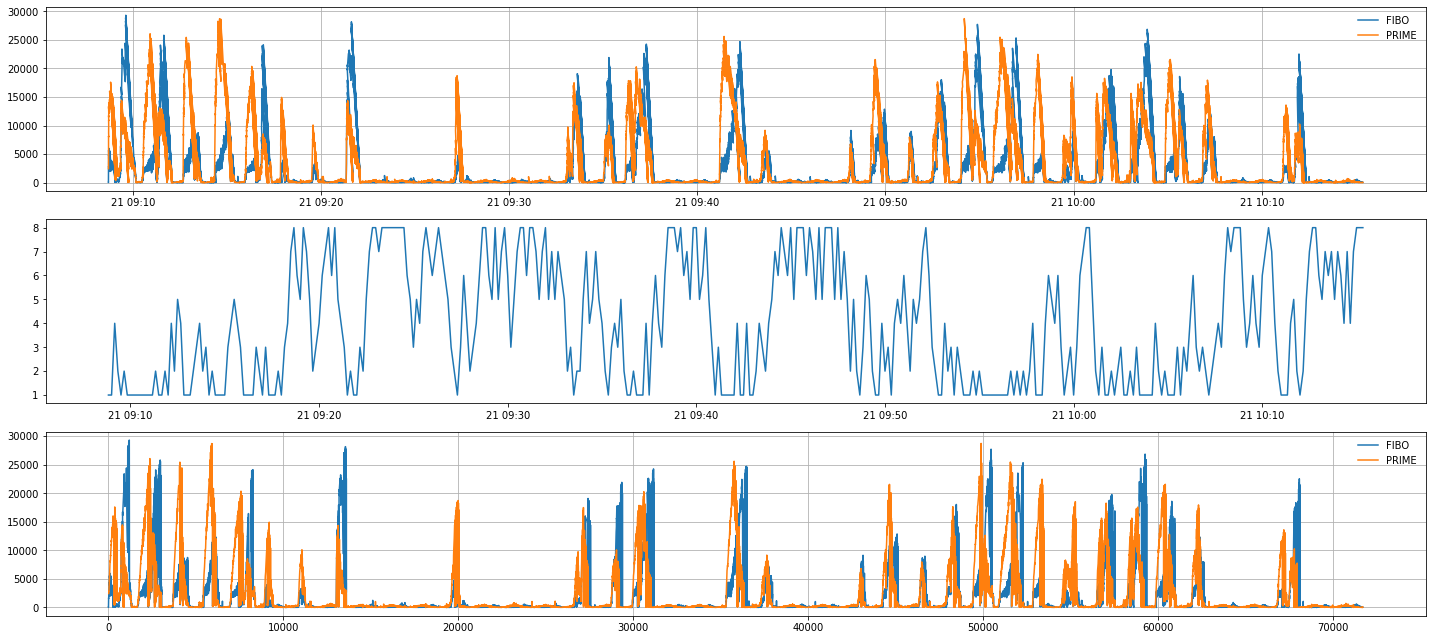

In [73]:
# Teljesen jó,

# Csupán az van hogy 3 plot van és a vízszintes méretük nem azonos ezért látszódik úgy, hogy az időpontok
# nincsenek szinkronban (1 és 2 plot)


def plot(dot):
    
    if dot == False:
        linewidth = 1.5
        marker = None
    if dot == True:
        linewidth = 0.0
        marker = '.'
        
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 9))
    ax0.plot(FIBO['date'], FIBO['Latency'], marker=marker, linewidth=linewidth, label='FIBO')
    ax0.plot(PRIME['date'], PRIME['Latency'], marker=marker, linewidth=linewidth, label='PRIME')
    ax0.grid(b='on')
    ax0.tick_params(axis='x', rotation=90)
    ax0.tick_params(axis='x', rotation=0)
    ax0.legend(frameon=False)

    ax1.plot(df['nntime'], df['worker_number'])
    ax1.tick_params(axis='x', rotation=90)
    ax1.tick_params(axis='x', rotation=0)

    ax2.plot(FIBO['Latency'], marker=marker, linewidth=linewidth, label='FIBO')
    ax2.plot(PRIME['Latency'], marker=marker, linewidth=linewidth, label='PRIME')
    ax2.grid(b='on')
    ax2.tick_params(axis='x', rotation=90)
    ax2.tick_params(axis='x', rotation=0)
    ax2.legend(frameon=False)
    plt.tight_layout()
    plt.show()
    
plot(dot = False)

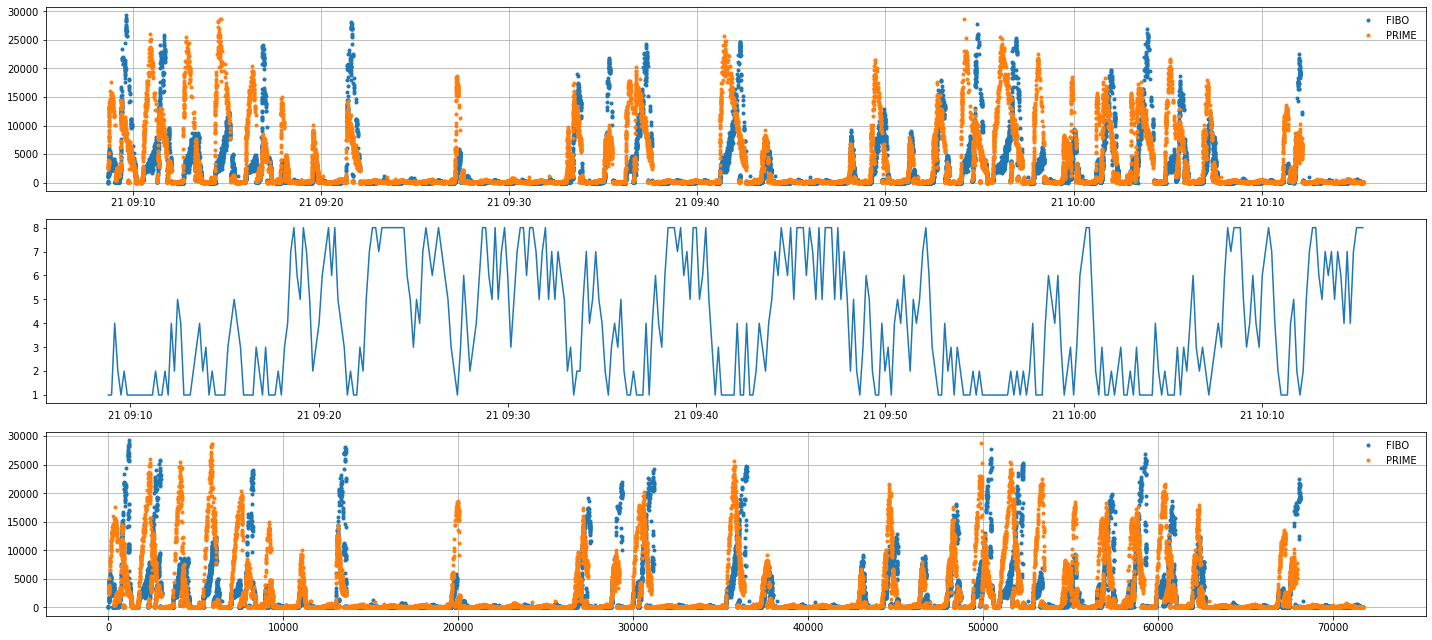

In [74]:
plot(dot = True)

Na tehát

Mire voltam kíváncsi?

Hogy az egyik REST API magával rántja-e a másikat?

---

Nagyítás

In [77]:
start_date = '2023-05-21 9:00'
end_date = '2023-05-21 10:30'

mask = (FIBO['date'] > start_date) & (FIBO['date'] <= end_date)
F = FIBO.loc[mask]

F.shape

(36792, 20)

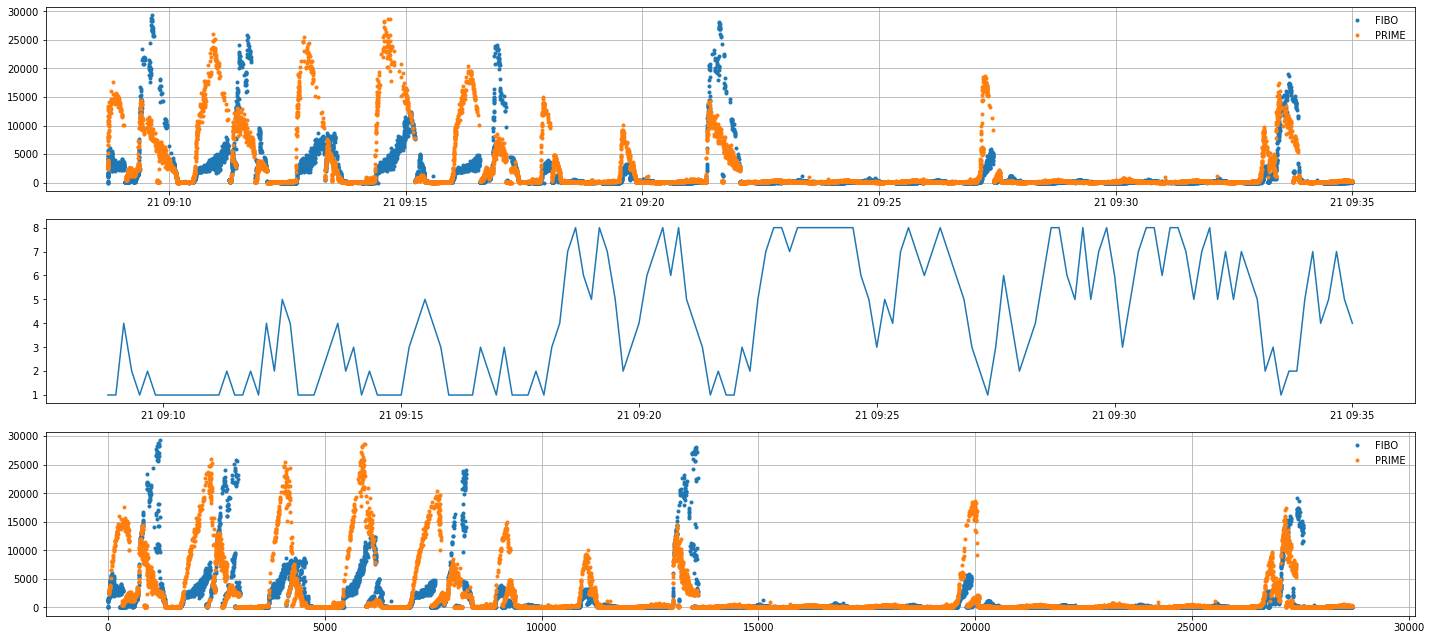

In [79]:
def zoom(start_date, end_date):

    mask = (FIBO['date'] > start_date) & (FIBO['date'] <= end_date)
    F = FIBO.loc[mask]

    mask = (PRIME['date'] > start_date) & (PRIME['date'] <= end_date)
    P = PRIME.loc[mask]
    
    mask = (df['nntime'] > start_date) & (df['nntime'] <= end_date)
    D = df.loc[mask]
    
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 9))
    ax0.plot(F['date'], F['Latency'], marker='.', linewidth=0, label='FIBO')
    ax0.plot(P['date'], P['Latency'], marker='.', linewidth=0, label='PRIME')
    ax0.grid(b='on')
    ax0.tick_params(axis='x', rotation=90)
    ax0.tick_params(axis='x', rotation=0)
    ax0.legend(frameon=False)

    ax1.plot(D['nntime'], D['worker_number'])
    ax1.tick_params(axis='x', rotation=90)
    ax1.tick_params(axis='x', rotation=0)

    ax2.plot(F['Latency'], marker='.', linewidth=0, label='FIBO')
    ax2.plot(P['Latency'], marker='.', linewidth=0, label='PRIME')
    ax2.grid(b='on')
    ax2.tick_params(axis='x', rotation=90)
    ax2.tick_params(axis='x', rotation=0)
    ax2.legend(frameon=False)
    plt.tight_layout()
    plt.show()

zoom('2023-05-21 8:59', '2023-05-21 9:35')

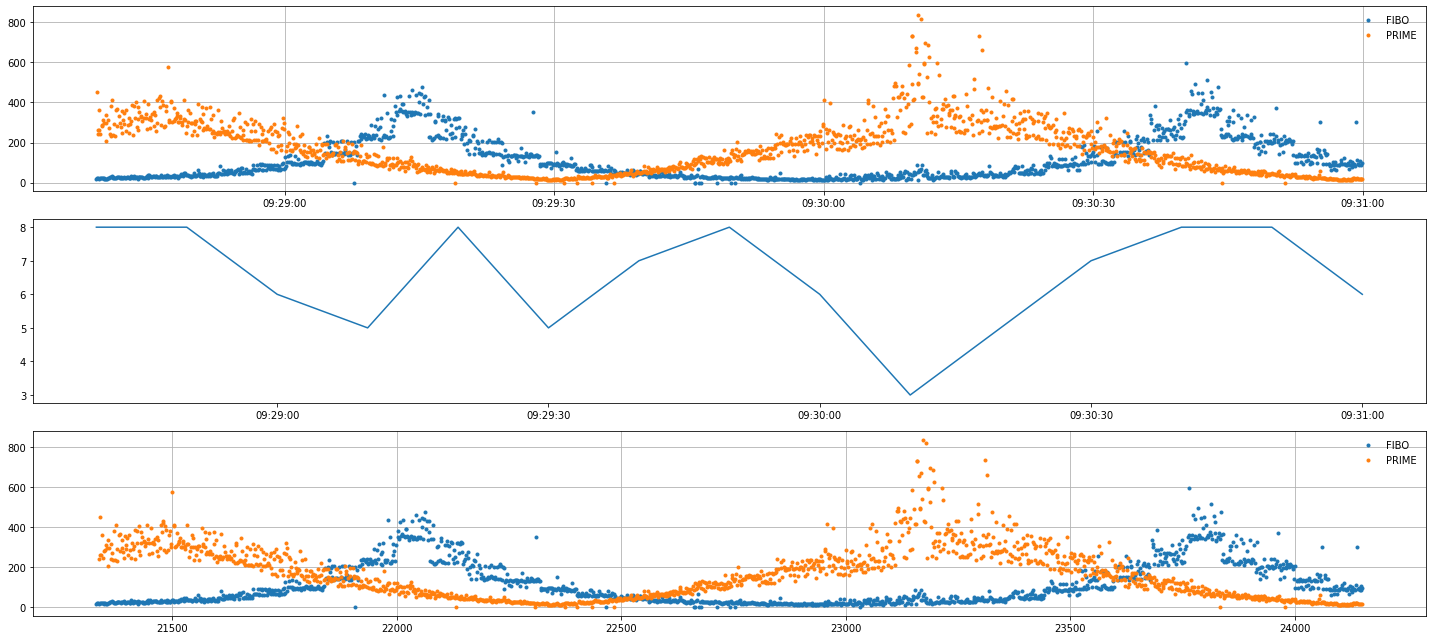

In [80]:
zoom('2023-05-21 9:28:39', '2023-05-21 9:31')

Hát azért így úgy tűnik, hogy magával húzza a másik REST API válaszidejét is.

## Helpers

In [ ]:
# Ha szövegből kell datatimeot csinálnom

from datetime import datetime

datetime_str = '2023-05-17 13:55:26'

datetime_object = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')

print(type(datetime_object))
print(datetime_object)
